In [13]:
import pandas as pd

# 1️⃣ Baca dataset awal
df = pd.read_csv("netflix_titles.csv")

# 2️⃣ Bersihkan spasi berlebih dan isi NaN
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.fillna("", inplace=True)

# 3️⃣ Tangani kolom Rating yang bocor ke Duration (miscollumn fix)
mask_miscollumn = df['rating'].str.contains('min|Season', na=False)
df.loc[mask_miscollumn, ['duration', 'rating']] = df.loc[mask_miscollumn, ['rating', 'duration']].values
df['rating'] = df['rating'].replace("", "Not Rated")

# 4️⃣ Siapkan tabel utama: titles.csv
titles = df[['show_id', 'title', 'type', 'date_added', 'release_year', 'rating', 'duration', 'description']].copy()
titles.to_csv("titles.csv", index=False)
print("✅ Saved titles.csv")

# 5️⃣ Pecah kolom LISTED_IN jadi GENRE
genres = (
    df[['show_id', 'listed_in']]
    .assign(listed_in=df['listed_in'].str.split(','))
    .explode('listed_in')
)
genres['listed_in'] = genres['listed_in'].str.strip()
genres.rename(columns={'listed_in': 'genre'}, inplace=True)
genres = genres[genres['genre'] != ""]
genres.to_csv("genres.csv", index=False)
print("✅ Saved genres.csv")

# 6️⃣ Pecah kolom COUNTRY jadi countries.csv
countries = (
    df[['show_id', 'country']]
    .assign(country=df['country'].str.split(','))
    .explode('country')
)
countries['country'] = countries['country'].str.strip()
countries = countries[countries['country'] != ""]
countries.to_csv("countries.csv", index=False)
print("✅ Saved countries.csv")

# 7️⃣ Pecah kolom DIRECTOR jadi directors.csv
directors = (
    df[['show_id', 'director']]
    .assign(director=df['director'].str.split(','))
    .explode('director')
)
directors['director'] = directors['director'].str.strip()
directors = directors[directors['director'] != ""]
directors.to_csv("directors.csv", index=False)
print("✅ Saved directors.csv")

# 8️⃣ Pecah kolom CAST jadi casts.csv
casts = (
    df[['show_id', 'cast']]
    .assign(cast=df['cast'].str.split(','))
    .explode('cast')
)
casts['cast'] = casts['cast'].str.strip()
casts = casts[casts['cast'] != ""]
casts.to_csv("casts.csv", index=False)
print("✅ Saved casts.csv")

# 9️⃣ Info jumlah baris per tabel
print("\n=== Ringkasan File yang Dibuat ===")
print(f"Titles   : {len(titles)} baris")
print(f"Genres   : {len(genres)} baris")
print(f"Countries: {len(countries)} baris")
print(f"Directors: {len(directors)} baris")
print(f"Casts    : {len(casts)} baris")

print("\n🎉 Dataset berhasil dipisah menjadi 5 file relasional untuk analisis lanjutan!")


/tmp/ipython-input-2135938206.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


✅ Saved titles.csv
✅ Saved genres.csv
✅ Saved countries.csv
✅ Saved directors.csv
✅ Saved casts.csv

=== Ringkasan File yang Dibuat ===
Titles   : 8807 baris
Genres   : 19323 baris
Countries: 10012 baris
Directors: 6978 baris
Casts    : 64126 baris

🎉 Dataset berhasil dipisah menjadi 5 file relasional untuk analisis lanjutan!


In [14]:
import pandas as pd
import re

# 1️⃣ Baca file titles.csv
titles = pd.read_csv("titles.csv")

# 2️⃣ Bersihkan spasi dan null
titles = titles.applymap(lambda x: x.strip() if isinstance(x, str) else x)
titles.fillna("", inplace=True)

# 3️⃣ Normalisasi nilai duration
def transform_duration(value):
    if not isinstance(value, str) or value.strip() == "":
        return pd.Series([None, None])

    value = value.strip()

    # Case 1: Movie - durasi dalam menit
    if "min" in value.lower():
        number = re.findall(r'\d+', value)
        return pd.Series([int(number[0]) if number else None, "Minutes"])

    # Case 2: TV Show - jumlah season
    elif "season" in value.lower():
        number = re.findall(r'\d+', value)
        return pd.Series([int(number[0]) if number else 1, "Seasons"])

    # Case 3: Tidak diketahui formatnya
    else:
        return pd.Series([None, None])

# 4️⃣ Terapkan transformasi ke semua baris
titles[['duration_value', 'duration_type']] = titles['duration'].apply(transform_duration)

# 5️⃣ Perbaiki nilai kosong berdasarkan type (opsional)
titles.loc[titles['type'] == "Movie", 'duration_type'] = titles.loc[titles['type'] == "Movie", 'duration_type'].fillna("Minutes")
titles.loc[titles['type'] == "TV Show", 'duration_type'] = titles.loc[titles['type'] == "TV Show", 'duration_type'].fillna("Seasons")

# 6️⃣ Simpan hasil akhir
titles.to_csv("titles_clean.csv", index=False)

# 7️⃣ Tampilkan ringkasan hasil
print("✅ titles_clean.csv berhasil dibuat!\n")
print("=== Contoh 10 baris pertama setelah transformasi ===")
print(titles[['title', 'type', 'duration', 'duration_value', 'duration_type']].head(10))

print("\n=== Statistik Ringkas ===")
print(titles['duration_type'].value_counts(dropna=False))


/tmp/ipython-input-2521244572.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  titles = titles.applymap(lambda x: x.strip() if isinstance(x, str) else x)


✅ titles_clean.csv berhasil dibuat!

=== Contoh 10 baris pertama setelah transformasi ===
                              title     type   duration  duration_value  \
0              Dick Johnson Is Dead    Movie     90 min              90   
1                     Blood & Water  TV Show  2 Seasons               2   
2                         Ganglands  TV Show   1 Season               1   
3             Jailbirds New Orleans  TV Show   1 Season               1   
4                      Kota Factory  TV Show  2 Seasons               2   
5                     Midnight Mass  TV Show   1 Season               1   
6  My Little Pony: A New Generation    Movie     91 min              91   
7                           Sankofa    Movie    125 min             125   
8     The Great British Baking Show  TV Show  9 Seasons               9   
9                      The Starling    Movie    104 min             104   

  duration_type  
0       Minutes  
1       Seasons  
2       Seasons  
3       Seas

In [15]:
# ========================================================
# Netflix Dataset Final Preparation (with output folders)
# Author: Lukas Project
# ========================================================

import pandas as pd
import os

# === Folder output ===
output_dir = "output_dataset_final"
os.makedirs(output_dir, exist_ok=True)  # buat folder utama jika belum ada

# === 1. Load titles (tabel utama) ===
titles = pd.read_csv("titles_clean.csv", dtype=str).fillna("")
if 'show_id' not in titles.columns:
    titles.insert(0, 'show_id', ['t' + str(i+1) for i in range(len(titles))])

titles = titles.reset_index(drop=True)
titles['title_id'] = titles.index + 1
cols = ['title_id'] + [c for c in titles.columns if c != 'title_id']
titles = titles[cols]

titles_path = os.path.join(output_dir, "titles_master.csv")
titles.to_csv(titles_path, index=False)
print(f"✅ Saved {titles_path} | rows: {len(titles)}")

# mapping show_id → title_id
show_to_titleid = titles[['show_id', 'title_id']].drop_duplicates()

# === Helper function ===
def load_rel_csv(path, value_col, new_col_name):
    df = pd.read_csv(path, dtype=str).fillna("")
    if value_col not in df.columns:
        raise ValueError(f"❌ Kolom '{value_col}' tidak ditemukan di {path}")
    df = df[['show_id', value_col]].rename(columns={value_col: new_col_name})
    df[new_col_name] = df[new_col_name].astype(str).str.strip()
    df = df[df[new_col_name] != ""].drop_duplicates(subset=['show_id', new_col_name])
    return df.reset_index(drop=True)

# === 2. Genres ===
genres = load_rel_csv("genres.csv", "genre", "genre")
genres = genres.merge(show_to_titleid, on='show_id', how='left')
genres['genre_id'] = range(1, len(genres)+1)
genres_rel = genres[['genre_id', 'title_id', 'show_id', 'genre']]

genres_path = os.path.join(output_dir, "genres_rel.csv")
genres_rel.to_csv(genres_path, index=False)
print(f"✅ Saved {genres_path} | rows: {len(genres_rel)}")

# === 3. Countries ===
countries = load_rel_csv("countries.csv", "country", "country")
countries = countries.merge(show_to_titleid, on='show_id', how='left')
countries['country_id'] = range(1, len(countries)+1)
countries_rel = countries[['country_id', 'title_id', 'show_id', 'country']]

countries_path = os.path.join(output_dir, "countries_rel.csv")
countries_rel.to_csv(countries_path, index=False)
print(f"✅ Saved {countries_path} | rows: {len(countries_rel)}")

# === 4. Directors (normalize jadi master + relasi) ===
directors = load_rel_csv("directors.csv", "director", "director")

directors_master = pd.DataFrame(sorted(directors['director'].unique()), columns=['director'])
directors_master['director_id'] = range(1, len(directors_master)+1)
directors_master = directors_master[['director_id', 'director']]
directors_master_path = os.path.join(output_dir, "directors_master.csv")
directors_master.to_csv(directors_master_path, index=False)
print(f"✅ Saved {directors_master_path} | rows: {len(directors_master)}")

# relasi
dir_map = directors_master.set_index('director')['director_id'].to_dict()
directors['director_id'] = directors['director'].map(dir_map)
directors = directors.merge(show_to_titleid, on='show_id', how='left')
directors_rel = directors[['show_id', 'title_id', 'director_id', 'director']].drop_duplicates()
directors_rel['director_rel_id'] = range(1, len(directors_rel)+1)
directors_rel = directors_rel[['director_rel_id', 'title_id', 'show_id', 'director_id', 'director']]

directors_rel_path = os.path.join(output_dir, "directors_rel.csv")
directors_rel.to_csv(directors_rel_path, index=False)
print(f"✅ Saved {directors_rel_path} | rows: {len(directors_rel)}")

# === 5. Casts (normalize juga) ===
casts = load_rel_csv("casts.csv", "cast", "cast")

casts_master = pd.DataFrame(sorted(casts['cast'].unique()), columns=['cast'])
casts_master['cast_id'] = range(1, len(casts_master)+1)
casts_master = casts_master[['cast_id', 'cast']]
casts_master_path = os.path.join(output_dir, "casts_master.csv")
casts_master.to_csv(casts_master_path, index=False)
print(f"✅ Saved {casts_master_path} | rows: {len(casts_master)}")

cast_map = casts_master.set_index('cast')['cast_id'].to_dict()
casts['cast_id'] = casts['cast'].map(cast_map)
casts = casts.merge(show_to_titleid, on='show_id', how='left')
casts_rel = casts[['show_id', 'title_id', 'cast_id', 'cast']].drop_duplicates()
casts_rel['cast_rel_id'] = range(1, len(casts_rel)+1)
casts_rel = casts_rel[['cast_rel_id', 'title_id', 'show_id', 'cast_id', 'cast']]

casts_rel_path = os.path.join(output_dir, "casts_rel.csv")
casts_rel.to_csv(casts_rel_path, index=False)
print(f"✅ Saved {casts_rel_path} | rows: {len(casts_rel)}")

# === 6. Compact titles ===
titles_compact = titles[['title_id', 'show_id', 'title', 'type', 'date_added', 'release_year', 'rating', 'duration', 'description']]
titles_compact_path = os.path.join(output_dir, "titles_master_compact.csv")
titles_compact.to_csv(titles_compact_path, index=False)
print(f"✅ Saved {titles_compact_path} | rows: {len(titles_compact)}")

# === Summary ===
print("\n🎯 Semua file tersimpan di folder:", output_dir)
print("├─ titles_master.csv")
print("├─ titles_master_compact.csv")
print("├─ genres_rel.csv")
print("├─ countries_rel.csv")
print("├─ directors_master.csv")
print("├─ directors_rel.csv")
print("├─ casts_master.csv")
print("└─ casts_rel.csv")



✅ Saved output_dataset_final/titles_master.csv | rows: 8807
✅ Saved output_dataset_final/genres_rel.csv | rows: 19323
✅ Saved output_dataset_final/countries_rel.csv | rows: 10012
✅ Saved output_dataset_final/directors_master.csv | rows: 4993
✅ Saved output_dataset_final/directors_rel.csv | rows: 6977
✅ Saved output_dataset_final/casts_master.csv | rows: 36439
✅ Saved output_dataset_final/casts_rel.csv | rows: 64124
✅ Saved output_dataset_final/titles_master_compact.csv | rows: 8807

🎯 Semua file tersimpan di folder: output_dataset_final
├─ titles_master.csv
├─ titles_master_compact.csv
├─ genres_rel.csv
├─ countries_rel.csv
├─ directors_master.csv
├─ directors_rel.csv
├─ casts_master.csv
└─ casts_rel.csv


Columns after merging countries:
Index(['genre_id', 'title_id', 'show_id_x', 'genre', 'show_id_y', 'title',
       'type', 'date_added', 'release_year', 'rating', 'duration',
       'description', 'country'],
      dtype='object')


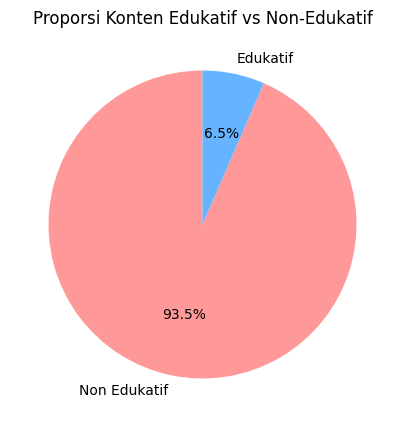

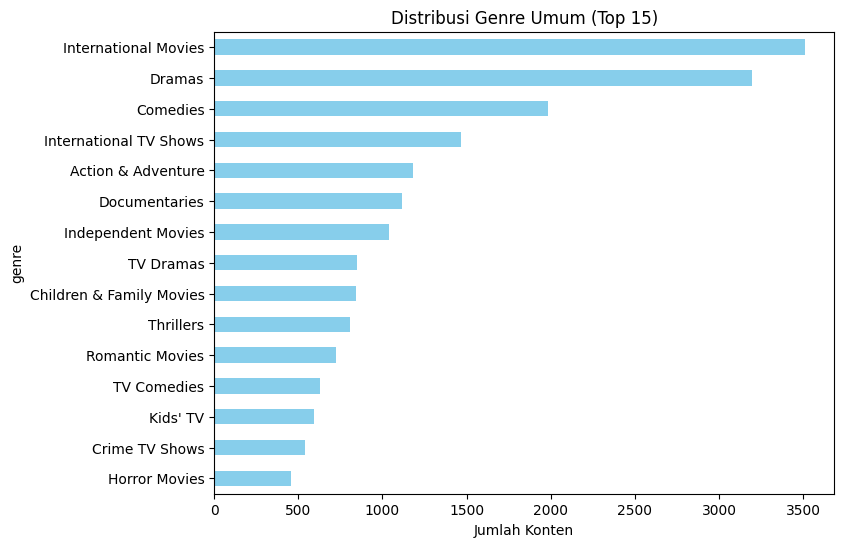

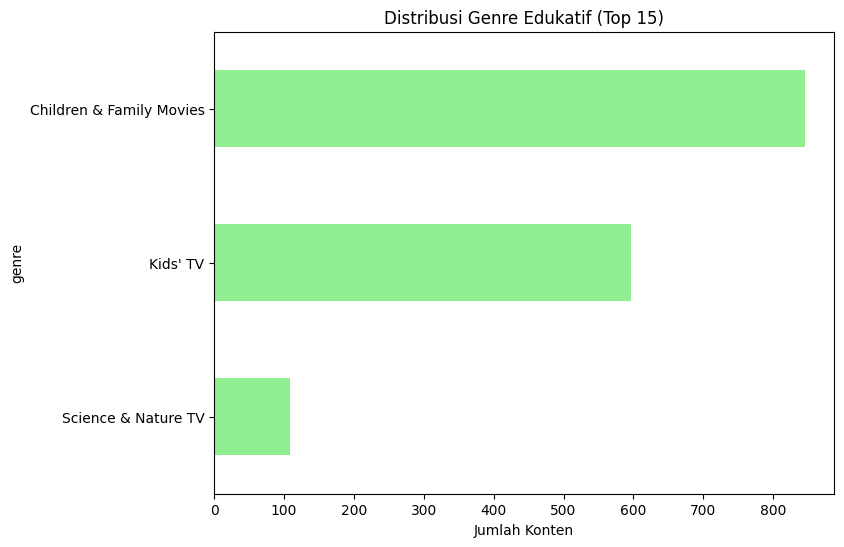

/tmp/ipython-input-1111916309.py:69: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




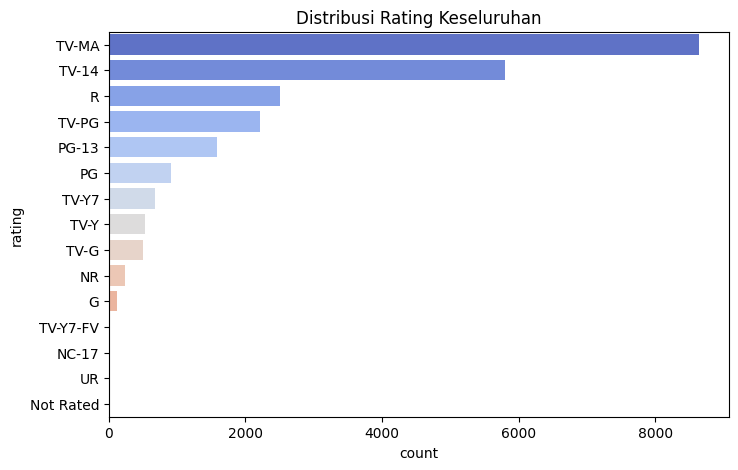

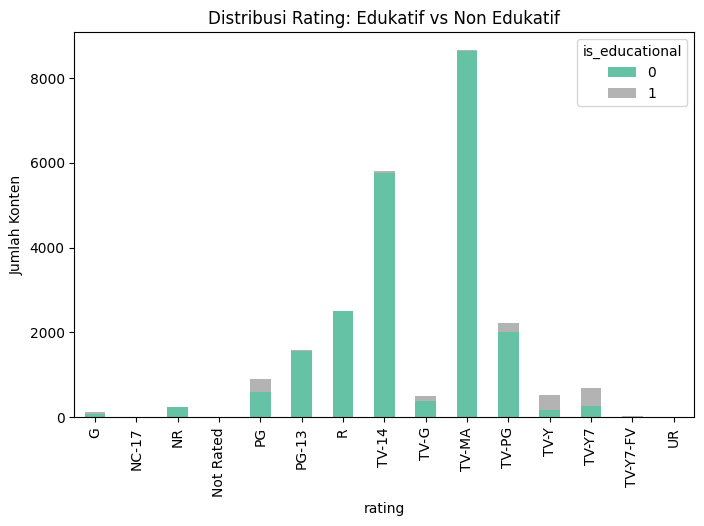

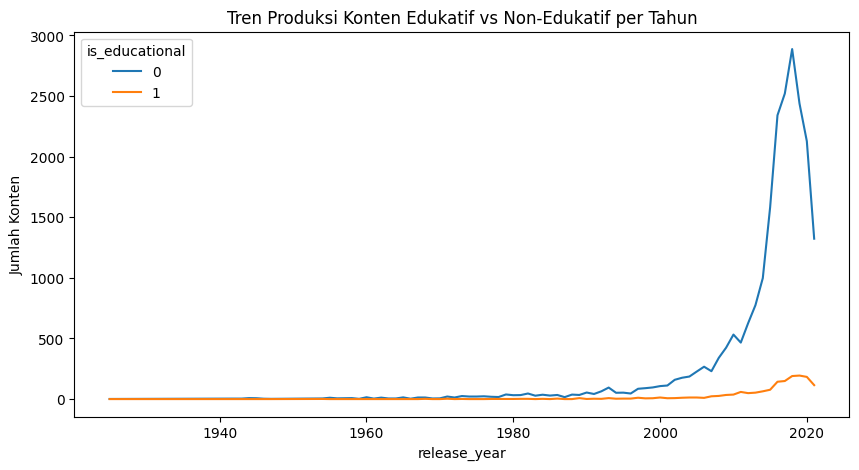

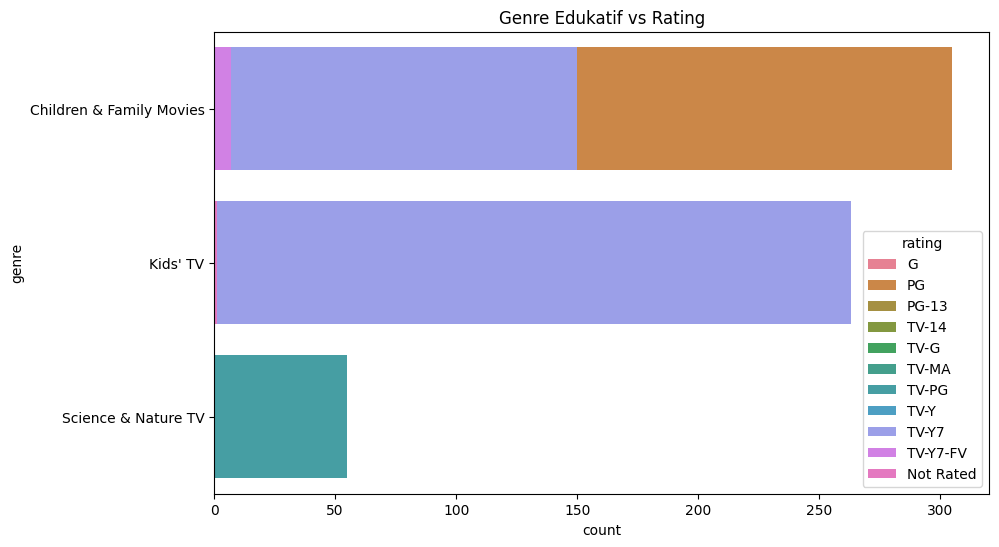

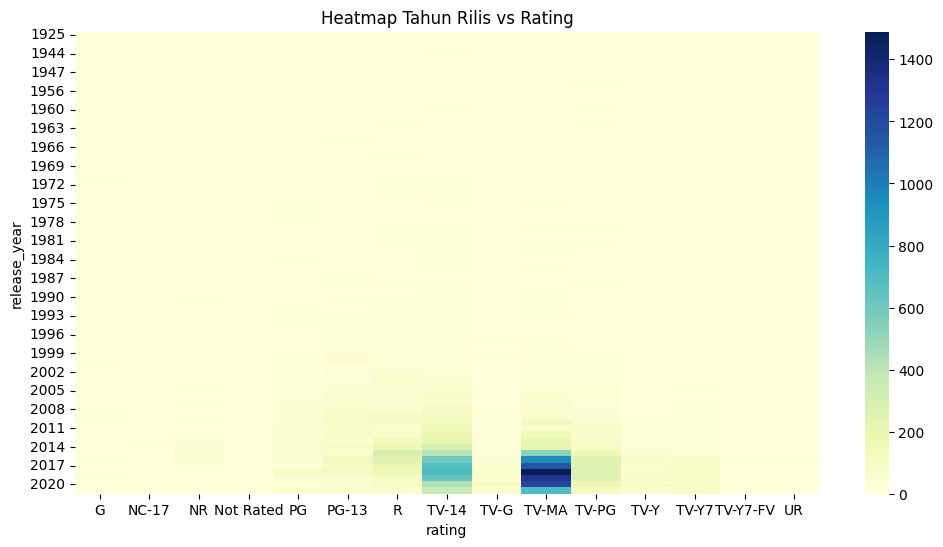

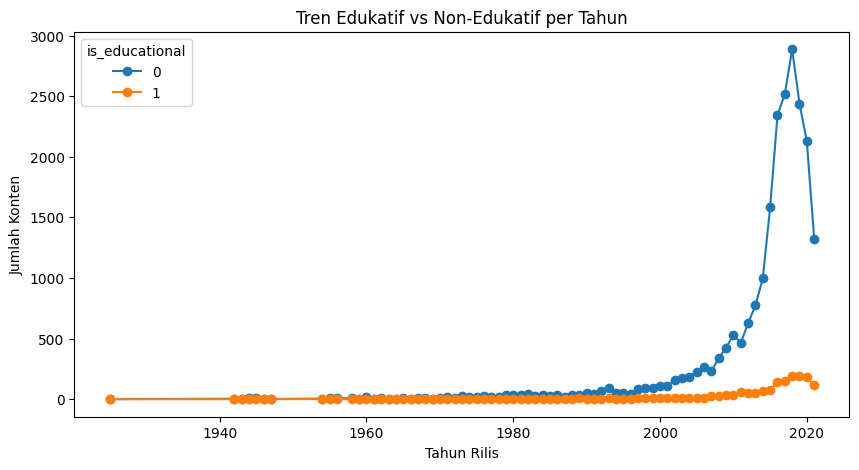

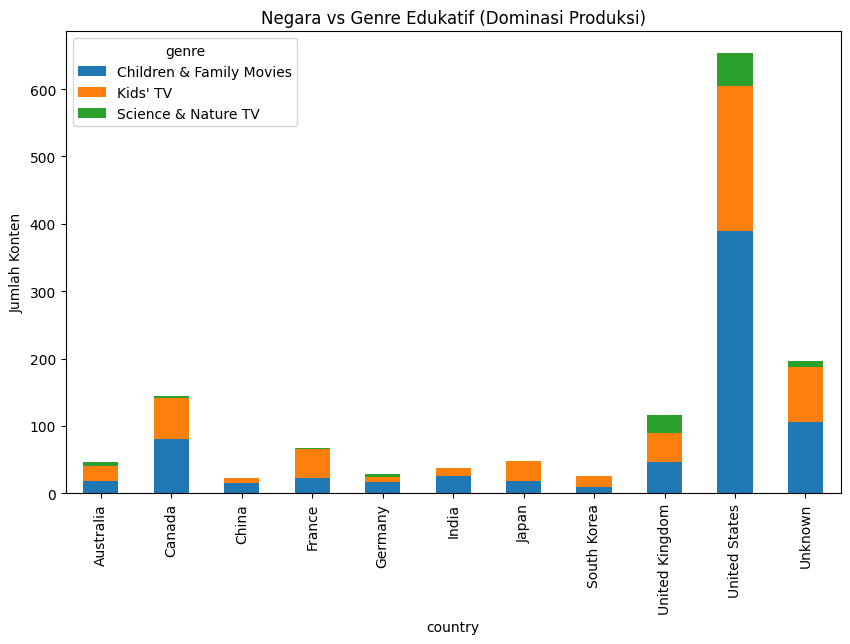

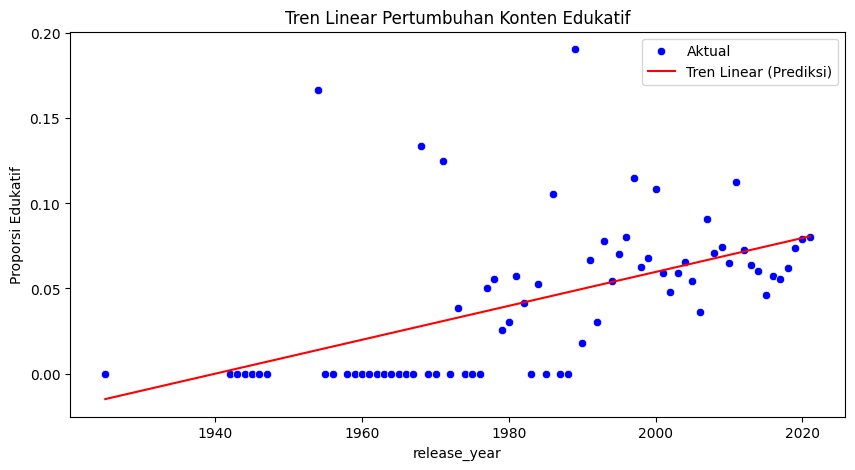

/tmp/ipython-input-1111916309.py:155: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




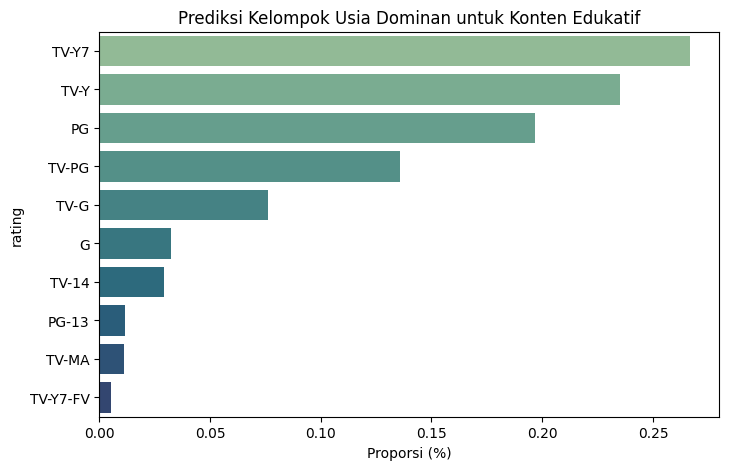

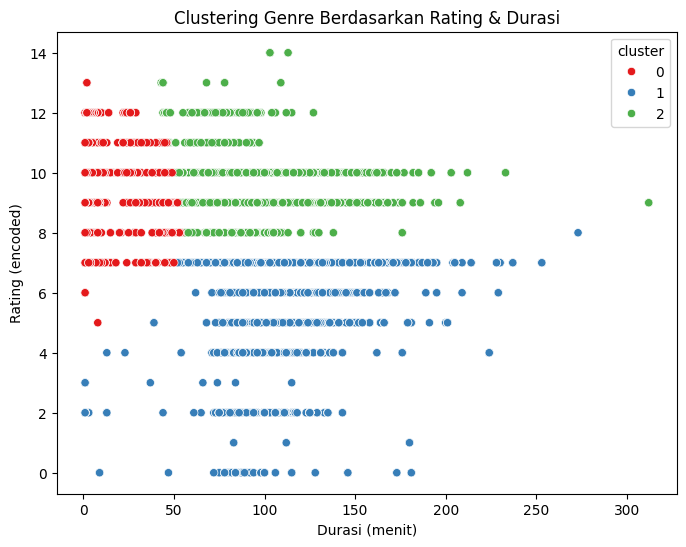

In [24]:
# =====================================================
# ANALISIS KOMPREHENSIF NETFLIX EDUKATIF
# Deskriptif, Diagnostik, Prediktif
# =====================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# === 1. Load Data ===
titles = pd.read_csv("output_dataset_final/titles_master_compact.csv")
genres = pd.read_csv("output_dataset_final/genres_rel.csv")
countries = pd.read_csv("output_dataset_final/countries_rel.csv") # Load countries data

merged = pd.merge(genres, titles, on='title_id', how='left')
merged = pd.merge(merged, countries[['title_id', 'country']], on='title_id', how='left') # Merge countries data

# === 2. Flag Edukatif ===
edu_keywords = ['Documentary', 'Education', 'Science', 'History', 'Kids', 'Learning', 'Children']
merged['is_educational'] = merged['genre'].str.contains('|'.join(edu_keywords), case=False, na=False).astype(int)

# === 3. Bersihkan kolom durasi & negara ===
merged['duration_value'] = merged['duration'].str.extract(r'(\d+)').astype(float)
# Ensure 'country' column exists after merge before fillingna
if 'country' in merged.columns:
    merged['country'] = merged['country'].fillna('Unknown')
else:
    # Handle case where country merge might fail unexpectedly
    merged['country'] = 'Unknown' # Create country column and fill with Unknown if merge failed

merged['rating'] = merged['rating'].fillna('Unknown')


# =====================================================
# 🟦 DESKRIPTIF ANALISIS
# =====================================================

# 1. Proporsi konten edukatif vs non-edukatif
edu_counts = merged['is_educational'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(edu_counts, labels=['Non Edukatif', 'Edukatif'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Proporsi Konten Edukatif vs Non-Edukatif")
plt.show()

# 2. Distribusi genre secara umum
plt.figure(figsize=(8,6))
merged['genre'].value_counts().head(15).sort_values().plot(kind='barh', color='skyblue')
plt.title("Distribusi Genre Umum (Top 15)")
plt.xlabel("Jumlah Konten")
plt.show()

# 3. Distribusi genre edukatif saja
edu_genres = merged[merged['is_educational']==1]['genre'].value_counts().head(15)
plt.figure(figsize=(8,6))
edu_genres.sort_values().plot(kind='barh', color='lightgreen')
plt.title("Distribusi Genre Edukatif (Top 15)")
plt.xlabel("Jumlah Konten")
plt.show()

# 4. Distribusi rating keseluruhan
plt.figure(figsize=(8,5))
sns.countplot(y='rating', data=merged, order=merged['rating'].value_counts().index, palette='coolwarm')
plt.title("Distribusi Rating Keseluruhan")
plt.show()

# 5. Distribusi rating untuk konten edukatif
edu_rating = merged.groupby(['rating', 'is_educational']).size().unstack().fillna(0)
edu_rating.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set2')
plt.title("Distribusi Rating: Edukatif vs Non Edukatif")
plt.ylabel("Jumlah Konten")
plt.show()

# 6. Jumlah konten edukatif per tahun rilis
trend_edu = merged.groupby(['release_year', 'is_educational']).size().unstack().fillna(0)
trend_edu.plot(figsize=(10,5))
plt.title("Tren Produksi Konten Edukatif vs Non-Edukatif per Tahun")
plt.ylabel("Jumlah Konten")
plt.show()

# 7. Persebaran negara produksi konten edukatif
edu_country = merged[merged['is_educational']==1]['country'].value_counts().reset_index()
edu_country.columns = ['country', 'count']

fig = px.choropleth(
    edu_country, locations='country', locationmode='country names',
    color='count', color_continuous_scale='Blues',
    title="Persebaran Negara Produksi Konten Edukatif"
)
fig.show()

# =====================================================
# 🟩 DIAGNOSA ANALISIS
# =====================================================

# 1. Genre edukatif vs rating
edu_genre_rating = merged[merged['is_educational']==1].groupby(['genre','rating']).size().reset_index(name='count')
plt.figure(figsize=(10,6))
sns.barplot(data=edu_genre_rating, x='count', y='genre', hue='rating', dodge=False)
plt.title("Genre Edukatif vs Rating")
plt.show()

# 2. Heatmap (Tahun vs Rating)
pivot_heat = merged.pivot_table(index='release_year', columns='rating', values='title_id', aggfunc='count').fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(pivot_heat, cmap='YlGnBu')
plt.title("Heatmap Tahun Rilis vs Rating")
plt.show()

# 3. Tren edukasi vs non-edukasi per tahun (line chart)
trend_edu.plot(figsize=(10,5), marker='o')
plt.title("Tren Edukatif vs Non-Edukatif per Tahun")
plt.xlabel("Tahun Rilis")
plt.ylabel("Jumlah Konten")
plt.show()

# 4. Negara vs genre edukatif (stacked bar)
edu_country_genre = merged[merged['is_educational']==1].groupby(['country','genre']).size().unstack().fillna(0)
# Filter to show only countries with more than 20 educational titles for better visualization
edu_country_genre.loc[edu_country_genre.sum(axis=1)>20].plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Negara vs Genre Edukatif (Dominasi Produksi)")
plt.ylabel("Jumlah Konten")
plt.show()

# =====================================================
# 🟥 PREDIKTIF ANALISIS (Sederhana)
# =====================================================

# 1. Tren pertumbuhan edukatif (Linear Regression Forecast)
from sklearn.linear_model import LinearRegression
import numpy as np

trend = merged.groupby('release_year')['is_educational'].mean().reset_index()
X = trend[['release_year']]
y = trend['is_educational']
model = LinearRegression().fit(X, y)
trend['pred'] = model.predict(X)

plt.figure(figsize=(10,5))
sns.scatterplot(x='release_year', y='is_educational', data=trend, color='blue', label='Aktual')
sns.lineplot(x='release_year', y='pred', data=trend, color='red', label='Tren Linear (Prediksi)')
plt.title("Tren Linear Pertumbuhan Konten Edukatif")
plt.ylabel("Proporsi Edukatif")
plt.show()

# 2. Prediksi kelompok usia dominan
edu_rating_prop = merged[merged['is_educational']==1]['rating'].value_counts(normalize=True).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=edu_rating_prop.values, y=edu_rating_prop.index, palette='crest')
plt.title("Prediksi Kelompok Usia Dominan untuk Konten Edukatif")
plt.xlabel("Proporsi (%)")
plt.show()

# 3. Clustering genre berdasarkan rating & durasi
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df_cluster = merged[['genre', 'rating', 'duration_value']].dropna()
df_cluster['rating_encoded'] = df_cluster['rating'].astype('category').cat.codes
X = df_cluster[['rating_encoded','duration_value']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Adjust number of clusters based on the data or domain knowledge if necessary
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Add n_init for explicit initialization
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cluster, x='duration_value', y='rating_encoded', hue='cluster', palette='Set1')
plt.title("Clustering Genre Berdasarkan Rating & Durasi")
plt.xlabel("Durasi (menit)")
plt.ylabel("Rating (encoded)")
plt.show()

## Meninjau Visualisasi: Apakah Menjawab Masalah Bisnis?

Berdasarkan visualisasi dan analisis deskriptif serta diagnostik yang telah kita lakukan, kita dapat menjawab pertanyaan bisnis utama: "Apakah Netflix dapat digunakan sebagai media pembelajaran, ditinjau dari genre konten dan rating tayangannya?" dan juga memenuhi tujuan analisis.

Berikut penjelasannya:

1.  **Mengidentifikasi seberapa banyak konten edukatif yang tersedia di Netflix.**
    *   Visualisasi Pie Chart "Proporsi Konten Edukatif vs Non-Edukatif" secara langsung menjawab pertanyaan ini. Kita melihat bahwa proporsi konten yang dikategorikan sebagai edukatif adalah sekitar **6.53%** dari total judul yang ada (berdasarkan definisi genre edukatif yang kita gunakan). Ini memberikan gambaran kuantitatif awal tentang ketersediaan konten edukatif di platform.

2.  **Mengetahui kategori genre edukatif apa yang paling banyak muncul.**
    *   Visualisasi Bar Chart "Distribusi Genre Edukatif (Top 15)" menunjukkan genre-genre yang paling dominan dalam kategori edukatif. Terlihat jelas bahwa **"Kids' TV"** dan **"Science & Nature TV"** menjadi genre yang paling banyak muncul. Ini mengindikasikan area konten edukatif utama yang ditawarkan Netflix.

3.  **Melihat distribusi rating pada genre edukatif (apakah untuk anak-anak, remaja, atau dewasa).**
    *   Visualisasi Bar Chart "Distribusi Rating: Edukatif vs Non Edukatif" dan "Genre Edukatif vs Rating" sangat relevan di sini. Visualisasi ini menunjukkan bahwa konten edukatif cenderung terkonsentrasi pada rating untuk audiens muda (TV-Y7, TV-Y, TV-PG, TV-G). Ini memberikan gambaran jelas mengenai kelompok usia target utama untuk konten edukatif di Netflix.

4.  **Menilai potensi Netflix sebagai media pembelajaran digital berdasarkan temuan data.**
    *   Meskipun proporsi total konten edukatif relatif kecil (sekitar 6.53%), adanya konsentrasi yang jelas pada genre spesifik ("Kids' TV", "Science & Nature TV") dan rating untuk audiens muda (TV-Y, TV-Y7, TV-PG, TV-G) menunjukkan bahwa Netflix *memiliki potensi* sebagai media pembelajaran digital, terutama untuk segmen anak-anak dan remaja awal.
    *   Analisis tren per tahun juga bisa memberikan insight apakah Netflix secara aktif menambah konten edukatif dari waktu ke waktu.
    *   Persebaran negara produksi konten edukatif juga menunjukkan negara mana yang menjadi kontributor utama, yang mungkin relevan dalam mempertimbangkan konteks budaya atau bahasa.

**Kesimpulan**:

Visualisasi yang dihasilkan memang menjawab pertanyaan bisnis dan tujuan analisis. Mereka secara jelas menunjukkan proporsi konten edukatif, genre dominannya, dan kelompok usia target (melalui rating). Meskipun bukan mayoritas, ada segmen konten edukatif yang teridentifikasi dan berpotensi digunakan untuk tujuan pembelajaran, terutama untuk audiens muda.

Analisis prediktif juga memberikan insight tambahan tentang fitur apa (seperti durasi dan tahun rilis) yang paling membedakan konten edukatif.


# **Perspective analisis: rekomendasi 10 film dan 10 tv show konten edukatif**

In [27]:
# Load the titles data
titles = pd.read_csv("output_dataset_final/titles_master_compact.csv")
genres = pd.read_csv("output_dataset_final/genres_rel.csv")

# Merge to get genre information
merged_titles_genres = pd.merge(titles, genres[['title_id', 'genre']], on='title_id', how='left')

# Create educational flag based on the defined keywords
edu_keywords = ['Documentary', 'Education', 'Science', 'History', 'Kids', 'Learning', 'Children']
merged_titles_genres['is_educational'] = merged_titles_genres['genre'].str.contains('|'.join(edu_keywords), case=False, na=False)

# Filter for educational content and drop duplicates based on title_id (since one title can have multiple educational genres)
educational_titles = merged_titles_genres[merged_titles_genres['is_educational']].drop_duplicates(subset=['title_id'])

# Separate movies and TV shows
educational_movies = educational_titles[educational_titles['type'] == 'Movie'].sort_values(by='title')
educational_tv_shows = educational_titles[educational_titles['type'] == 'TV Show'].sort_values(by='title')

# Get the top 10 of each
top_10_edu_movies = educational_movies.head(10)
top_10_edu_tv_shows = educational_tv_shows.head(10)

print("=== Top 10 Film Edukasi (Berdasarkan Abjad) ===")
display(top_10_edu_movies)

print("\n=== Top 10 TV Show Edukasi (Berdasarkan Abjad) ===")
display(top_10_edu_tv_shows)

=== Top 10 Film Edukasi (Berdasarkan Abjad) ===


,title_id,show_id,title,type,date_added,release_year,rating,duration,description,genre,is_educational
11476,5116,s5116,48 Christmas Wishes,Movie,"December 20, 2017",2017,TV-G,84 min,When a small town's letters to Santa accidenta...,Children & Family Movies,True
12053,5390,s5390,A 2nd Chance,Movie,"July 1, 2017",2011,PG,95 min,A gymnast lacks the confidence she needs to re...,Children & Family Movies,True
4000,1845,s1845,A Babysitter's Guide to Monster Hunting,Movie,"October 15, 2020",2020,TV-PG,99 min,"Recruited by a secret society of babysitters, ...",Children & Family Movies,True
241,108,s108,A Champion Heart,Movie,"September 4, 2021",2018,G,90 min,When a grieving teen must work off her debt to...,Children & Family Movies,True
11576,5164,s5164,A Christmas Prince,Movie,"November 17, 2017",2017,TV-PG,92 min,Christmas comes early for an aspiring young jo...,Children & Family Movies,True
7076,3181,s3181,A Christmas Prince: The Royal Baby,Movie,"December 5, 2019",2019,TV-PG,85 min,Christmas brings the ultimate gift to Aldovia:...,Children & Family Movies,True
9758,4352,s4352,A Christmas Prince: The Royal Wedding,Movie,"November 30, 2018",2018,TV-PG,93 min,"A year after helping Richard secure the crown,...",Children & Family Movies,True
286,128,s128,A Cinderella Story,Movie,"September 1, 2021",2004,PG,95 min,Teen Sam meets the boy of her dreams at a danc...,Children & Family Movies,True
7094,3189,s3189,A Cinderella Story: Christmas Wish,Movie,"December 1, 2019",2019,PG,86 min,Despite her vain stepmother and mean stepsiste...,Children & Family Movies,True
7397,3316,s3316,A Fairly Odd Summer,Movie,"November 2, 2019",2014,TV-Y7,68 min,"In this live-action adventure, the gang heads ...",Children & Family Movies,True



=== Top 10 TV Show Edukasi (Berdasarkan Abjad) ===


,title_id,show_id,title,type,date_added,release_year,rating,duration,description,genre,is_educational
6228,2817,s2817,100 Humans,TV Show,"March 13, 2020",2020,TV-14,1 Season,One hundred hardy souls from diverse backgroun...,Science & Nature TV,True
8173,3668,s3668,3Below: Tales of Arcadia,TV Show,"July 12, 2019",2019,TV-Y7,2 Seasons,"After crash-landing on Earth, two royal teen a...",Kids' TV,True
727,325,s325,44 Cats,TV Show,"August 1, 2021",2020,TV-Y7,3 Seasons,Paw-esome tales abound when singing furry frie...,Kids' TV,True
13015,5845,s5845,72 Cutest Animals,TV Show,"June 1, 2016",2016,TV-PG,1 Season,This series examines the nature of cuteness an...,Science & Nature TV,True
10571,4703,s4703,72 Dangerous Animals: Asia,TV Show,"August 10, 2018",2018,TV-14,1 Season,"From fangs to claws to venomous stings, they a...",Science & Nature TV,True
11470,5113,s5113,72 Dangerous Animals: Latin America,TV Show,"December 22, 2017",2017,TV-14,1 Season,"Powerful cats, indestructible arachnids and fl...",Science & Nature TV,True
13018,5846,s5846,72 Dangerous Places to Live,TV Show,"June 1, 2016",2016,TV-PG,1 Season,"Get up close and personal with avalanches, fie...",Science & Nature TV,True
13351,6027,s6027,9 Months That Made You,TV Show,"March 1, 2017",2016,TV-PG,1 Season,Witness the wonders of human gestation through...,Science & Nature TV,True
9466,4219,s4219,A Series of Unfortunate Events,TV Show,"January 1, 2019",2019,TV-PG,3 Seasons,The extraordinary Baudelaire orphans face tria...,Kids' TV,True
7422,3328,s3328,A Year In Space,TV Show,"November 1, 2019",2015,TV-PG,1 Season,Two astronauts attempt to brave a life in Eart...,Science & Nature TV,True
